<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_Julho_2020/blob/master/Segmentacao_e_salva_TODAS_FotoS_v01_julho_01_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd

In [2]:
!pip install mahotas

In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020

import Go2BlackWhite
import Go2Mahotas

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [5]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [6]:
''''''
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
Transfere='Fotos9Amostras720_e_varios_graos.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()


fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado


In [7]:
#Construção da rede com as fotos já recortadas anteriormente
labels = [] #882 imagens recortadas por nós
images = [] #882 imagens lidas no formato de lista 
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    images.append(cv2.imread(f))
    labels.append(f)


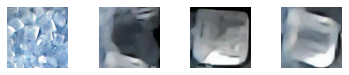

In [8]:
# Import the 'pyplot' module of 'matplotlib'
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images that you want to see 
traffic_signs = [25, 30, 36, 40]

# Fill out the subplots with the random images that you defined 
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

In [9]:
# Import the 'transform' module from 'skimage'
from skimage import transform 

# Rescale the images in the 'images' array
images28 = [transform.resize(image, (28, 28)) for image in images]

In [10]:
# Import 'rgb2gray' from 'skimage.color'
from skimage.color import rgb2gray

# Convert 'images28' to an array
images28 = np.array(images28)

# Convert 'images28' to grayscale
images28 = rgb2gray(images28)

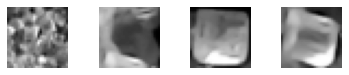

In [11]:
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]], cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    
# Show the plot
plt.show()

In [12]:
# Segmentation: start here......

In [13]:
# start top

In [14]:
#Start to use the big image
Size=1200 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)

In [15]:
Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

In [16]:
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0]

In [17]:
print(img.shape)

(1200, 1200)


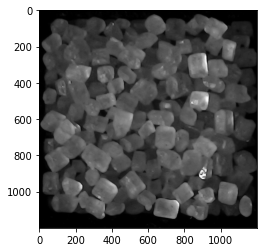

In [18]:
plt.imshow(img, cmap = "gray")

In [19]:
#First top

In [20]:
a=0
b=1200
c=100
d=200
Num=12
ww=[]
label=[]
SizeWidth=[]  

for i in range(Num):
  #x=random.randint(a, b)
  #y=random.randint(a, b)
  #Width=random.randint(c, d)
  x=randint(a, b)
  y=randint(a, b)
  Width=randint(c, d)
  img_1st=np.zeros((Width,Width)).astype(np.int64)

  for i in range(Width):
    for j in range(Width):

      size_x=Width+x
      size_y=Width+y
    
      if(size_x>=Size):
        x=Size-Width

      if(size_y>= Size):
        y=Size-Width

      img_1st[i,j]=np.copy(img[i+y,j+x])
      
  ww.append(img_1st)
  SizeWidth.append(Width)
  nome = "W=" + str(Width)+" x="+str(x)+" y="+str(y)
  label.append(nome)


In [21]:
#2nd top

In [22]:
Num=12
Size=28
img28_all=[]
for i in range(Num):
  data=np.array(ww[i])
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)
  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  img28_all.append(img28)

img28_all=np.array(img28_all)
print(img28_all.shape)


(12, 28, 28)


In [23]:
#3th top

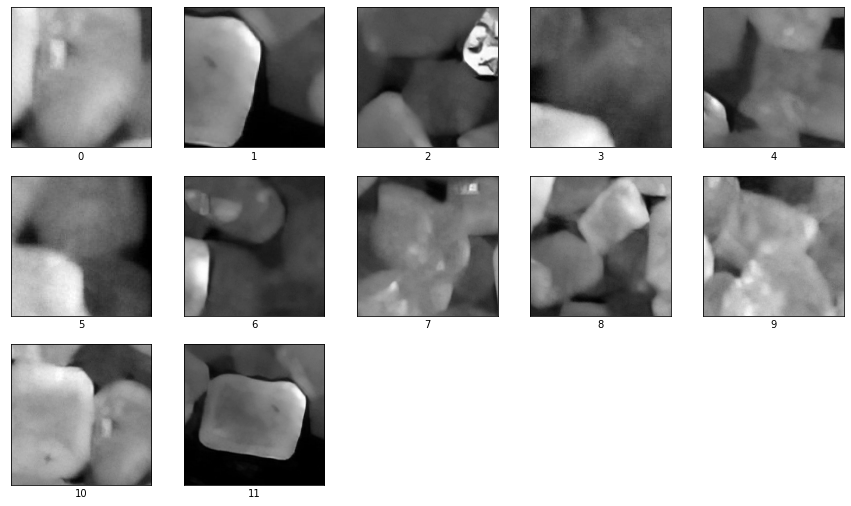

In [24]:

plt.figure(figsize=(15,15))
for i in range(Num):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(ww[i], cmap = "gray")
  plt.xlabel(i)

  

In [25]:
#4th top

In [26]:
Types_top=[]
plt.figure(figsize=(15,15))
for i in range(Num):
  print('i=',i,'=====')
  Valor=input('Tipo=')
  Types_top.append(Valor)

i= 0 =====
Tipo=G
i= 1 =====
Tipo=G
i= 2 =====
Tipo=G
i= 3 =====
Tipo=G
i= 4 =====
Tipo=G
i= 5 =====
Tipo=G
i= 6 =====
Tipo=G
i= 7 =====
Tipo=G
i= 8 =====
Tipo=G
i= 9 =====
Tipo=G
i= 10 =====
Tipo=G
i= 11 =====
Tipo=G


<Figure size 1080x1080 with 0 Axes>

In [27]:
# 5th top

In [28]:
Num=12
img28_ravel_all=[]
for i in range(Num):
  img28_ravel=np.copy(img28_all[i].ravel())
  img28_ravel_all.append(img28_ravel)
  # img28_ravel_all.append(img28_all[i].ravel())

In [29]:
# 6th top

In [30]:
img28_top=pd.DataFrame(img28_ravel_all)
img28_top.insert(0,"Type",Types_top)
img28_top.insert(0, "Width", SizeWidth) 

In [31]:
# Start middle

In [32]:
#Start to use the big image
Size=1200 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0]

In [33]:
#First middle

In [34]:
a=0
b=1200
c=100
d=200
Num=12
ww=[]
label=[]
SizeWidth=[]  
for i in range(Num):
  #x=random.randint(a, b)
  #y=random.randint(a, b)
  #Width=random.randint(c, d)
  x=randint(a, b)
  y=randint(a, b)
  Width=randint(c, d)
  img_1st=np.zeros((Width,Width)).astype(np.int64)

  for i in range(Width):
    for j in range(Width):

      size_x=Width+x
      size_y=Width+y
    
      if(size_x>=Size):
        x=Size-Width

      if(size_y>= Size):
        y=Size-Width

      img_1st[i,j]=np.copy(img[i+y,j+x])
  ww.append(img_1st)
  SizeWidth.append(Width)
  nome = "W=" + str(Width)+" x="+str(x)+" y="+str(y)
  label.append(nome)


In [35]:
print([i+y,j+x])
print([x,y])
print([Size,Width])

[1199, 817]
[625, 1007]
[1200, 193]


In [36]:
print(np.array(img).shape)

(1200, 1200)


In [37]:
#2nd middle

In [38]:
Num=12
Size=28
img28_all=[]
for i in range(Num):
  data=np.array(ww[i])
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)
  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  img28_all.append(img28)

img28_all=np.array(img28_all)
print(img28_all.shape)


(12, 28, 28)


In [39]:
#3th middle

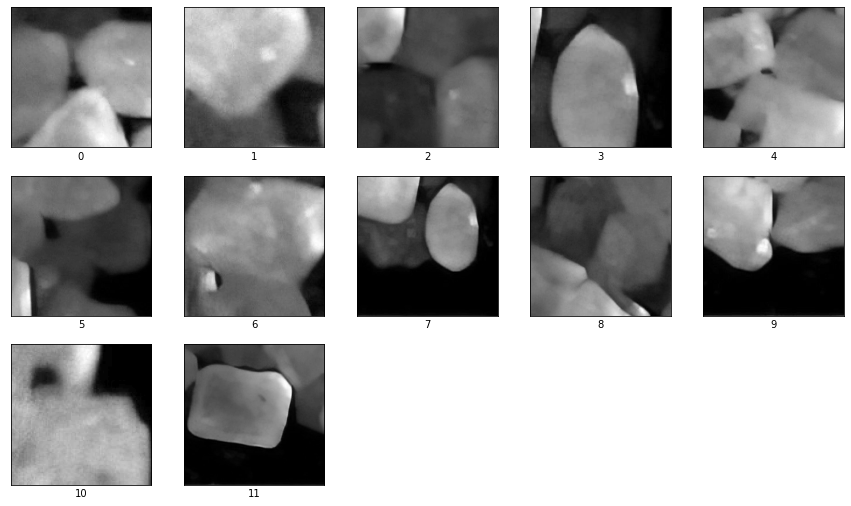

In [40]:

plt.figure(figsize=(15,15))
for i in range(Num):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(ww[i], cmap = "gray")
  plt.xlabel(i)

  

In [41]:
#4th middle

In [42]:
Types_middle=[]
plt.figure(figsize=(15,15))
for i in range(Num):
  print('i=',i,'=====')
  Valor=input('Tipo=')
  Types_middle.append(Valor)

i= 0 =====
Tipo=I
i= 1 =====
Tipo=I
i= 2 =====
Tipo=I
i= 3 =====
Tipo=I
i= 4 =====
Tipo=I
i= 5 =====
Tipo=I
i= 6 =====
Tipo=I
i= 7 =====
Tipo=I
i= 8 =====
Tipo=I
i= 9 =====
Tipo=I
i= 10 =====
Tipo=I
i= 11 =====
Tipo=G


<Figure size 1080x1080 with 0 Axes>

In [43]:
# 5th middle

In [44]:
Num=12
img28_ravel_all=[]
for i in range(Num):
  img28_ravel=np.copy(img28_all[i].ravel())
  img28_ravel_all.append(img28_ravel)
  # img28_ravel_all.append(img28_all[i].ravel())

In [45]:
# 6th middle

In [46]:
img28_middle=pd.DataFrame(img28_ravel_all)
img28_middle.insert(0,"Type",Types_middle)
img28_middle.insert(0, "Width", SizeWidth) 

In [47]:
# start bottom

In [48]:
#Start to use the big image
Size=1200 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0]

In [49]:
# First bottom

In [50]:
a=0
b=1200
c=100
d=200
Num=12
ww=[]
label=[]
SizeWidth=[]

for i in range(Num):
  #x=random.randint(a, b)
  #y=random.randint(a, b)
  #Width=random.randint(c, d)
  x=randint(a, b)
  y=randint(a, b)
  Width=randint(c, d)
  img_1st=np.zeros((Width,Width)).astype(np.int64)

  for i in range(Width):
    for j in range(Width):

      size_x=Width+x
      size_y=Width+y
    
      if(size_x>=Size):
        x=Size-Width

      if(size_y>= Size):
        y=Size-Width

      img_1st[i,j]=np.copy(img[i+y,j+x])
  ww.append(img_1st)
  SizeWidth.append(Width)
  nome = "W=" + str(Width)+" x="+str(x)+" y="+str(y)
  label.append(nome)


In [51]:
# 2nd bottom

In [52]:
Num=12
Size=28
img28_all=[]
for i in range(Num):
  data=np.array(ww[i])
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)
  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  img28_all.append(img28)

img28_all=np.array(img28_all)
print(img28_all.shape)


(12, 28, 28)


In [53]:
# 3th bottom

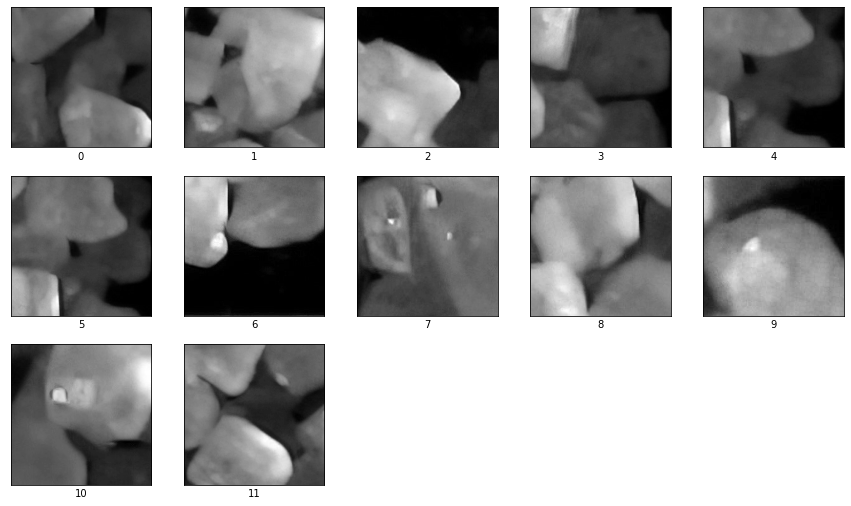

In [54]:

plt.figure(figsize=(15,15))
for i in range(Num):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(ww[i], cmap = "gray")
  plt.xlabel(i)

  

In [55]:
# 4th bottom

In [56]:
Types_bottom=[]
plt.figure(figsize=(15,15))
for i in range(Num):
  print('i=',i,'=====')
  Valor=input('Tipo=')
  Types_bottom.append(Valor)

i= 0 =====
Tipo=I
i= 1 =====
Tipo=I
i= 2 =====
Tipo=I
i= 3 =====
Tipo=I
i= 4 =====
Tipo=I
i= 5 =====
Tipo=I
i= 6 =====
Tipo=I
i= 7 =====
Tipo=I
i= 8 =====
Tipo=I
i= 9 =====
Tipo=I
i= 10 =====
Tipo=I
i= 11 =====
Tipo=I


<Figure size 1080x1080 with 0 Axes>

In [57]:
# 5th bottom

In [58]:
Num=12
img28_ravel_all=[]
for i in range(Num):
  img28_ravel=np.copy(img28_all[i].ravel())
  img28_ravel_all.append(img28_ravel)
  # img28_ravel_all.append(img28_all[i].ravel())

In [59]:
# 6th bottom

In [60]:
img28_bottom=pd.DataFrame(img28_ravel_all)
img28_bottom.insert(0,"Type",Types_bottom)
img28_bottom.insert(0, "Width", SizeWidth) 
print(img28_bottom)

    Width Type           0  ...         781         782        783
0     170    I   93.518066  ...  139.352402  141.022705  81.027687
1     184    I   68.611992  ...   86.788750   76.265114  69.863884
2     153    I    4.556197  ...   35.303474   39.100094  44.228378
3     178    I  109.822899  ...   28.658756   19.606871   3.714178
4     161    I   77.803406  ...    7.398866    1.612476   0.841210
5     197    I   90.024590  ...   15.726637    1.897575   0.795821
6     141    I  131.344955  ...    7.964589    7.988381   8.070066
7     138    I   35.786602  ...   85.658691   86.166771  86.767906
8     123    I  102.228378  ...   75.694626   76.001266  77.444183
9     112    I   62.625000  ...   53.812500   56.750000  54.812500
10    134    I   60.194923  ...   61.793049   56.932060  51.480953
11    193    I  102.261322  ...   57.614326   57.056381  58.632420

[12 rows x 786 columns]


In [61]:
frames = [img28_top,img28_middle,img28_bottom]
img28_all=pd.concat(frames)
print(img28_all)

    Width Type           0  ...         781         782         783
0     101    G  114.016479  ...   99.836884  101.670822  104.776009
1     113    G   38.430733  ...    0.679850    1.000000    1.249980
2     145    G  108.206841  ...  109.867294  108.835770  104.213844
3     119    G   55.868511  ...   37.131489   39.207611   39.463669
4     144    G   79.215279  ...   35.108025   42.487656   42.739967
5     110    G   53.958675  ...   23.040329   19.602974   13.279669
6     170    G   84.882080  ...   58.306717   55.917374   51.580212
7     198    G   84.781746  ...   55.025200   48.052238   39.776756
8     191    G  140.797455  ...   96.151077  102.120010   98.536011
9     187    G   64.946098  ...   77.166000   65.345963   64.182190
10    157    G  115.029221  ...   50.593414   39.923729   50.153519
11    188    G   65.341782  ...    0.000000    0.101403    0.098234
0     121    I   44.058197  ...   98.003281  102.833488  107.947479
1     121    I   91.602615  ...   23.626188   27

In [62]:
# found drive
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [63]:
ww[11].shape

(193, 193)

In [64]:
img28_all.to_csv('img28_all.csv',float_format="%.5f")
# save in drive
!cp img28_all.csv drive/My\ Drive/Maria_Gabriela_Textura_dados_jan_2020/

In [65]:
img28_all=img28_all.drop(['Type'], axis = 1) 
print(img28_all)

    Width           0           1  ...         781         782         783
0     101  114.016479  124.251152  ...   99.836884  101.670822  104.776009
1     113   38.430733   46.812748  ...    0.679850    1.000000    1.249980
2     145  108.206841  105.671761  ...  109.867294  108.835770  104.213844
3     119   55.868511   58.546715  ...   37.131489   39.207611   39.463669
4     144   79.215279   79.141205  ...   35.108025   42.487656   42.739967
5     110   53.958675   55.864792  ...   23.040329   19.602974   13.279669
6     170   84.882080   84.788795  ...   58.306717   55.917374   51.580212
7     198   84.781746   89.063972  ...   55.025200   48.052238   39.776756
8     191  140.797455  137.815964  ...   96.151077  102.120010   98.536011
9     187   64.946098   76.506279  ...   77.166000   65.345963   64.182190
10    157  115.029221  110.534996  ...   50.593414   39.923729   50.153519
11    188   65.341782   58.970123  ...    0.000000    0.101403    0.098234
0     121   44.058197   3